### No 1

Plot dari data inflasi adalah sebagai berikut:

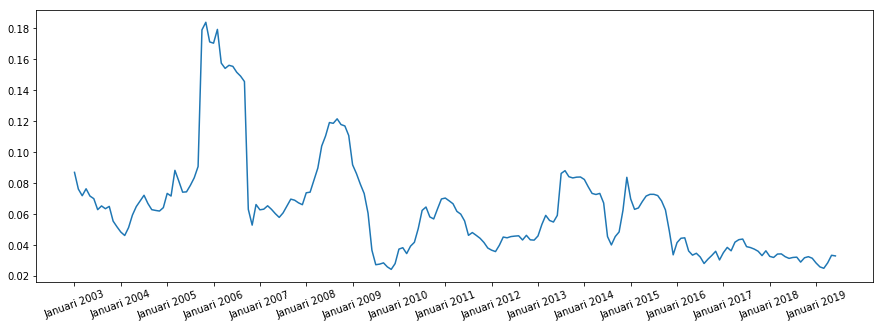

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

#input data
df      = pd.read_excel (r'data_inflasi_indonesia.xlsx')
month   = df['Month'].tolist()
month.reverse()  #supaya urutannya mulai dari tahun 2003
month   = month[1:len(month)]  #supaya desember 2002 tidak masuk karena nilainya 0
inflasi = df['Inflasi'].tolist()
inflasi.reverse()
inflasi = inflasi[1:len(inflasi)]

#plot data inflasi
t        = np.arange(0,len(month))
x_labels = t[0::12]
plt.figure(figsize=(15,5))
plt.plot(t,inflasi)
plt.xticks(x_labels,month[0::12], rotation=20)
plt.show()

ADF Unit Root Test dari data inflasi:

In [6]:
result = adfuller(inflasi, autolag='AIC')
print('P-value :',result[1])

P-value : 0.38987669092034716


Karena data inflasi tidak stasioner terhadap mean, maka akan dilakukan differencing dan transformasi log pada data inflasi.

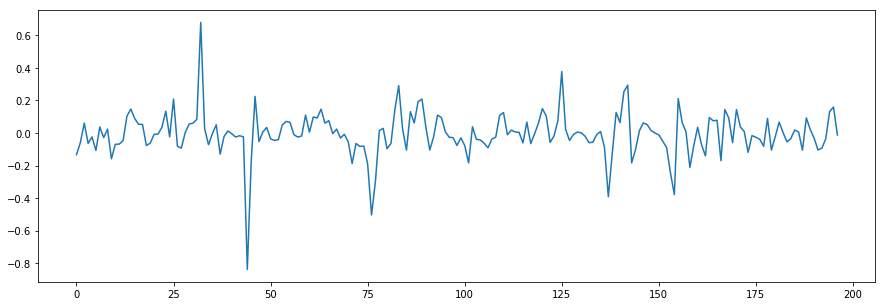

In [21]:
#lakukan differencing & transformasi log
inflasi_trans = []
for i in range(1,len(inflasi)):
    inflasi_trans.append(np.log(inflasi[i])-np.log(inflasi[i-1]))

#plot hasil transformasi    
t = np.arange(0,len(inflasi_trans))
plt.figure(figsize=(15,5))
plt.plot(t,inflasi_trans)
plt.show()

ADF Unit Root Test dari data differencing inflasi:

In [115]:
result = adfuller(inflasi_trans, autolag='AIC')
print('P-value :',result[1])

P-value : 9.412082670843295e-09


Selanjutnya, plot ACF dan PACF dari transformasi data inflasi sebagai berikut:

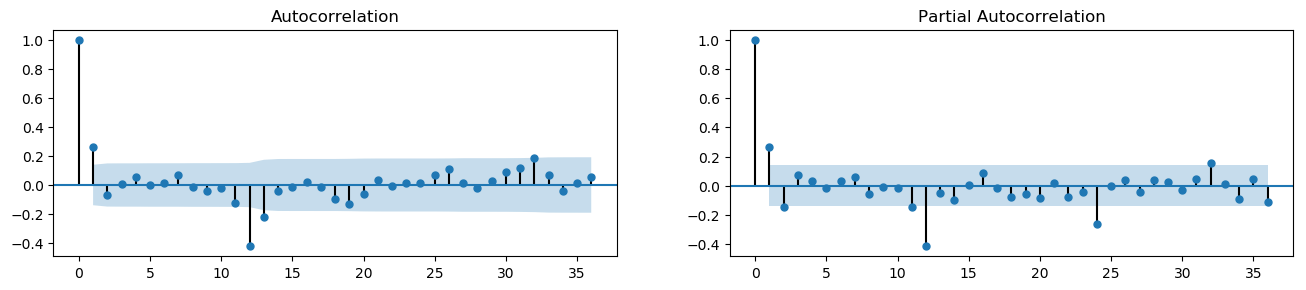

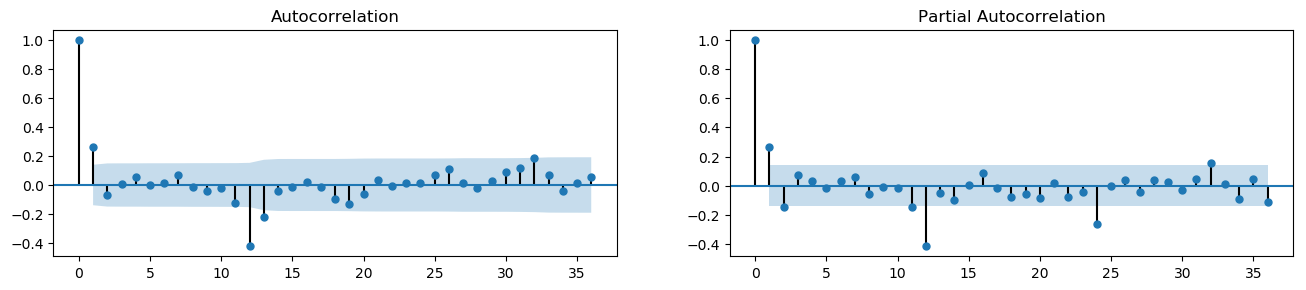

In [117]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(inflasi_trans, lags=36, ax=axes[0])
plot_pacf(inflasi_trans, lags=36, ax=axes[1])

Berdasarkan plot ACf dan PACF di atas, diperoleh model ARIMA(2,1,2) sebagai model awal. Akan diselidiki manakah di antara beberapa model ARIMA dari ARIMA(2,1,2) sampai ARIMA(1,1,0) yang signifikan.<br>
Pertama untuk model ARIMA(2,1,2)

In [42]:
for i in range(2,-1,-1):
    for j in range(2,-1,-1):
        if i==0 and j==0:
            continue
        else:
            model_cons       = ARIMA(inflasi_trans,order=(j,1,i))
            model_nocons     = ARIMA(inflasi_trans,order=(j,1,i))
            model_fit_cons   = model_cons.fit()
            model_fit_nocons = model_nocons.fit(trend='nc')
            print(model_fit_cons.summary(),'\n')
            print(model_fit_nocons.summary(),'\n')

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  196
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 122.495
Method:                       css-mle   S.D. of innovations              0.128
Date:                Fri, 13 Mar 2020   AIC                           -232.990
Time:                        21:47:52   BIC                           -213.321
Sample:                             1   HQIC                          -225.027
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.487e-05      0.000     -0.069      0.945      -0.000       0.000
ar.L1.D.y     -0.6709      0.072     -9.275      0.000      -0.813      -0.529
ar.L2.D.y      0.2094      0.073      2.886      0.0

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  196
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 120.911
Method:                       css-mle   S.D. of innovations              0.129
Date:                Fri, 13 Mar 2020   AIC                           -231.823
Time:                        21:47:55   BIC                           -215.432
Sample:                             1   HQIC                          -225.187
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.186e-05      0.000     -0.113      0.910      -0.000       0.000
ar.L1.D.y      0.3045      0.071      4.300      0.000       0.166       0.443
ar.L2.D.y     -0.1418      0.071     -2.000      0.0

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  196
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  99.264
Method:                       css-mle   S.D. of innovations              0.146
Date:                Fri, 13 Mar 2020   AIC                           -190.527
Time:                        21:47:56   BIC                           -177.415
Sample:                             1   HQIC                          -185.219
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.006      0.114      0.910      -0.011       0.012
ar.L1.D.y     -0.3820      0.066     -5.766      0.000      -0.512      -0.252
ar.L2.D.y     -0.3771      0.066     -5.713      0.0

Diperoleh model yang signifikan:<br>
1. ARIMA(0,1,2) tanpa konstan
2. ARIMA(2,1,1) tanpa konstan
3. ARIMA(1,1,1) tanpa konstan
4. ARIMA(0,1,1) tanpa konstan
5. ARIMA(2,1,0) tanpa konstan
6. ARIMA(1,1,0) tanpa konstan V

Dari keenam model tersebut, akan dipilih model terbaik dengan menyelidiki nilai loglikelihood, AIC, BIC yang terendah dari keenam model.<br> 
loglikelihood=120.886, 120.905, 118.934, 111.663, 99.257, 84.226 <br>
AIC=-235.772, -233.810, -231.867, -219.327, -192.515, -164.452 <br>
BIC=-225.937, -220.697, -222.033, -212.771, -182.680, -157.895 <br>

Selanjutnya, akan dilakukan forecast dari bulan Juli 2019 sampai Desember 2019.

In [112]:
forecast_trans = arima110_fit.predict(start=len(inflasi_trans), end=len(inflasi_trans)+5)
forecast       = []
for i in range(len(forecast_trans)):
    forecast.append(np.exp(forecast_trans[i]+np.log(inflasi[len(inflasi)-(i+1)])))

#buat table total data inflasi    
month.append('Juli 2019')
month.append('Agustus 2019')
month.append('September 2019')
month.append('Oktober 2019')
month.append('November 2019')
month.append('Desember 2019')

for i in forecast:
    inflasi.append(i)
    
data = {'Month':month, 'Inflasi':inflasi}
pd.DataFrame(data)

,Month,Inflasi
0,Januari 2003,0.086800
1,Februari 2003,0.076000
2,Maret 2003,0.071700
3,April 2003,0.076200
4,Mei 2003,0.071500
5,Juni 2003,0.069800
6,Juli 2003,0.062700
7,Agustus 2003,0.065100
8,September 2003,0.063300
9,Oktober 2003,0.064800


Plot total data inflasi.

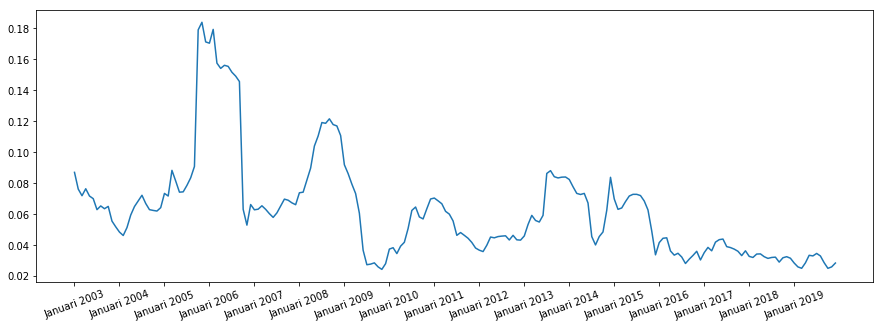

In [113]:
t        = np.arange(0,len(month))
x_labels = t[0::12]
plt.figure(figsize=(15,5))
plt.plot(t,inflasi)
plt.xticks(x_labels,month[0::12], rotation=20)
plt.show()

### No 2

Terlebih dahulu akan diselidiki normalitas dari variabel mpg.

In [121]:
import pandas as pd
from scipy.stats import shapiro

#input data
df   = pd.read_excel (r'mtcars.xlsx')
mpg  = df['mpg'].tolist()
cyl  = df['cyl'].tolist()
disp = df['disp'].tolist()
hp   = df['hp'].tolist()
drat = df['drat'].tolist()
wt   = df['wt'].tolist()
qsec = df['qsec'].tolist()
vs   = df['vs'].tolist()
am   = df['am'].tolist()
gear = df['gear'].tolist()
carb = df['carb'].tolist()

#cek normalitas variabel mpg
result = shapiro(mpg)
print('P-value :',result[1])

P-value : 0.12288373708724976


Karena variabel mpg berdistribusi normal, maka analisis regresi dapat dilakukan. Dicek scatterplot antara variabel mpg dengan variabel lainnya.

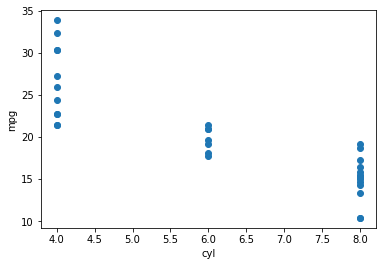

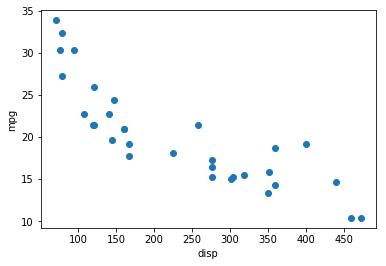

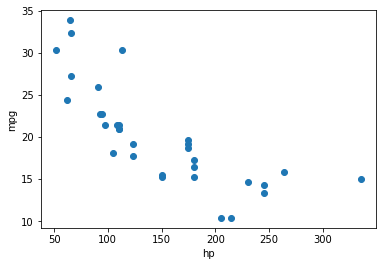

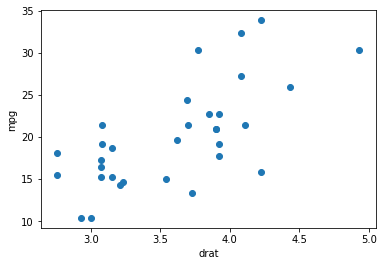

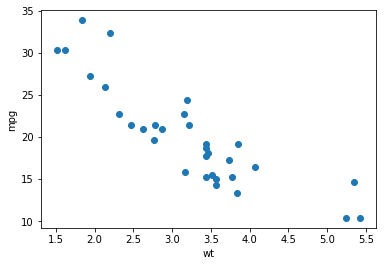

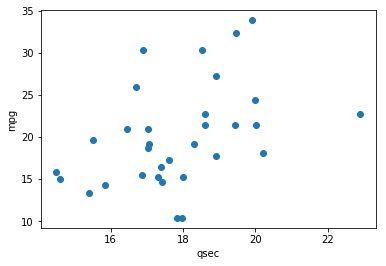

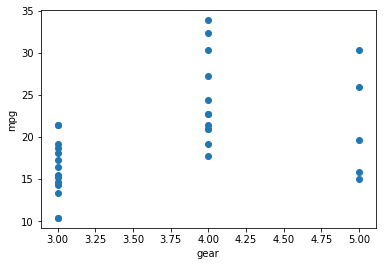

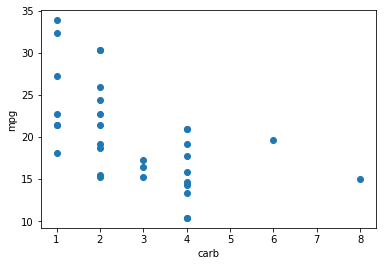

In [154]:
import matplotlib.pyplot as plt

plt.scatter(cyl, mpg)
plt.xlabel('cyl')
plt.ylabel('mpg')
plt.show()

plt.scatter(disp, mpg)
plt.xlabel('disp')
plt.ylabel('mpg')
plt.show()

plt.scatter(hp, mpg)
plt.xlabel('hp')
plt.ylabel('mpg')
plt.show()

plt.scatter(drat, mpg)
plt.xlabel('drat')
plt.ylabel('mpg')
plt.show()

plt.scatter(wt, mpg)
plt.xlabel('wt')
plt.ylabel('mpg')
plt.show()

plt.scatter(qsec, mpg)
plt.xlabel('qsec')
plt.ylabel('mpg')
plt.show()

plt.scatter(gear, mpg)
plt.xlabel('gear')
plt.ylabel('mpg')
plt.show()

plt.scatter(carb, mpg)
plt.xlabel('carb')
plt.ylabel('mpg')
plt.show()

Terlihat bahwa terdapat hubungan yang linear antara variabel mpg dengan variabel lainnya. Dengan demikian, analisis regresi linear berganda dapat dilakukan.<br>
Pertama, semua variabel akan dimasukkan ke dalam model. Kemudian diselidiki manakah variabel yang tidak signifikan.

In [162]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X=df[['cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']]
Y=df['mpg']
X=sm.add_constant(X)

model=sm.OLS(Y,X)
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           3.79e-07
Time:                        02:00:27   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Karena variabel cyl tidak signifikan dan memiliki nilai p-value terbesar, maka variabel cyl dikeluarkan dari model. 

In [164]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X=df[['disp','hp','drat','wt','qsec','vs','am','gear','carb']]
Y=df['mpg']
X=sm.add_constant(X)

model=sm.OLS(Y,X)
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     16.21
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           9.03e-08
Time:                        02:03:49   Log-Likelihood:                -69.864
No. Observations:                  32   AIC:                             159.7
Df Residuals:                      22   BIC:                             174.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9601     13.530      0.810      0.427     -17.100      39.020
disp           0.0128      0.017      0.763      0.454      -0.022       0.048
hp            -0.0219      0.021     -1.048      0.306      -0.065       0.021
drat           0.8352      1.536      0.544      0.592      -2.351       4.021
wt            -3.6925      1.840     -2.007      0.057      -7.507       0.122
qsec           0.8424      0.687      1.227      0.233      -0.582       2.267
vs             0.3897      1.948      0.200      0.843      -3.650       4.430
am             2.5774      1.940      1.328      0.198      -1.447       6.601
gear           0.7116      1.366      0.521      0.608      -2.121       3.544
carb          -0.2196      0.789     -0.278      0.783      -1.855       1.416
==============================================================================
Omnibus:                        1.842   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.695
Skew:                           0.509   Prob(JB):                        0.428
Kurtosis:                       2.514   Cond. No.                     9.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Karena variabel vs tidak signifikan dan memiliki nilai p-value terbesar, maka variabel vs dikeluarkan dari model. 

In [166]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X=df[['disp','hp','drat','wt','qsec','am','gear','carb']]
Y=df['mpg']
X=sm.add_constant(X)

model=sm.OLS(Y,X)
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     19.02
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           2.01e-08
Time:                        02:04:44   Log-Likelihood:                -69.893
No. Observations:                  32   AIC:                             157.8
Df Residuals:                      23   BIC:                             171.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7683     11.892      0.821      0.420     -14.833      34.369
disp           0.0121      0.016      0.753      0.459      -0.021       0.045
hp            -0.0210      0.020     -1.051      0.304      -0.062       0.020
drat           0.8751      1.491      0.587      0.563      -2.210       3.960
wt            -3.7115      1.798     -2.064      0.050      -7.432       0.009
qsec           0.9108      0.583      1.562      0.132      -0.295       2.117
am             2.5239      1.881      1.342      0.193      -1.368       6.416
gear           0.7598      1.316      0.577      0.569      -1.962       3.482
carb          -0.2480      0.759     -0.327      0.747      -1.819       1.323
==============================================================================
Omnibus:                        1.945   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.786
Skew:                           0.520   Prob(JB):                        0.409
Kurtosis:                       2.492   Cond. No.                     8.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Karena variabel carb tidak signifikan dan memiliki nilai p-value terbesar, maka variabel carb dikeluarkan dari model. 

In [167]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X=df[['disp','hp','drat','wt','qsec','am','gear']]
Y=df['mpg']
X=sm.add_constant(X)

model=sm.OLS(Y,X)
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     22.56
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           4.22e-09
Time:                        02:05:36   Log-Likelihood:                -69.967
No. Observations:                  32   AIC:                             155.9
Df Residuals:                      24   BIC:                             167.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1976     11.542      0.797      0.433     -14.624      33.020
disp           0.0155      0.012      1.278      0.213      -0.010       0.041
hp            -0.0247      0.016     -1.548      0.135      -0.058       0.008
drat           0.8102      1.450      0.559      0.582      -2.183       3.803
wt            -4.1307      1.236     -3.342      0.003      -6.681      -1.580
qsec           1.0098      0.489      2.066      0.050       0.001       2.019
am             2.5898      1.835      1.411      0.171      -1.198       6.378
gear           0.6064      1.206      0.503      0.620      -1.883       3.095
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                2.325
Skew:                           0.613   Prob(JB):                        0.313
Kurtosis:                       2.508   Cond. No.                     8.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Karena variabel gear tidak signifikan dan memiliki nilai p-value terbesar, maka variabel gear dikeluarkan dari model. 

In [168]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X=df[['disp','hp','drat','wt','qsec','am']]
Y=df['mpg']
X=sm.add_constant(X)

model=sm.OLS(Y,X)
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     27.09
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           8.64e-10
Time:                        02:06:24   Log-Likelihood:                -70.134
No. Observations:                  32   AIC:                             154.3
Df Residuals:                      25   BIC:                             164.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7106     10.975      0.976      0.338     -11.894      33.315
disp           0.0131      0.011      1.193      0.244      -0.010       0.036
hp            -0.0218      0.015     -1.488      0.149      -0.052       0.008
drat           1.0207      1.367      0.746      0.462      -1.796       3.837
wt            -4.0445      1.206     -3.355      0.003      -6.527      -1.562
qsec           0.9907      0.480      2.064      0.050       0.002       1.979
am             2.9847      1.634      1.827      0.080      -0.380       6.350
==============================================================================
Omnibus:                        2.483   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.220
Skew:                           0.566   Prob(JB):                        0.330
Kurtosis:                       2.379   Cond. No.                     7.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Karena variabel drat tidak signifikan dan memiliki nilai p-value terbesar, maka variabel drat dikeluarkan dari model. 

In [169]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X=df[['disp','hp','wt','qsec','am']]
Y=df['mpg']
X=sm.add_constant(X)

model=sm.OLS(Y,X)
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     32.96
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           1.84e-10
Time:                        02:07:11   Log-Likelihood:                -70.487
No. Observations:                  32   AIC:                             153.0
Df Residuals:                      26   BIC:                             161.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3619      9.741      1.474      0.152      -5.661      34.384
disp           0.0112      0.011      1.060      0.299      -0.011       0.033
hp            -0.0212      0.015     -1.460      0.156      -0.051       0.009
wt            -4.0843      1.194     -3.420      0.002      -6.539      -1.630
qsec           1.0069      0.475      2.118      0.044       0.030       1.984
am             3.4705      1.486      2.336      0.027       0.416       6.525
==============================================================================
Omnibus:                        1.988   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.796
Skew:                           0.489   Prob(JB):                        0.407
Kurtosis:                       2.375   Cond. No.                     6.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Karena variabel disp tidak signifikan dan memiliki nilai p-value terbesar, maka variabel disp dikeluarkan dari model. 

In [170]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X=df[['hp','wt','qsec','am']]
Y=df['mpg']
X=sm.add_constant(X)

model=sm.OLS(Y,X)
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     40.74
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           4.59e-11
Time:                        02:07:45   Log-Likelihood:                -71.164
No. Observations:                  32   AIC:                             152.3
Df Residuals:                      27   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4402      9.319      1.871      0.072      -1.681      36.561
hp            -0.0176      0.014     -1.247      0.223      -0.047       0.011
wt            -3.2381      0.890     -3.639      0.001      -5.064      -1.412
qsec           0.8106      0.439      1.847      0.076      -0.090       1.711
am             2.9255      1.397      2.094      0.046       0.059       5.792
==============================================================================
Omnibus:                        2.435   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.209
Skew:                           0.585   Prob(JB):                        0.331
Kurtosis:                       2.465   Cond. No.                     3.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Karena variabel hp tidak signifikan dan memiliki nilai p-value terbesar, maka variabel hp dikeluarkan dari model. 

In [171]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X=df[['wt','qsec','am']]
Y=df['mpg']
X=sm.add_constant(X)

model=sm.OLS(Y,X)
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           1.21e-11
Time:                        02:08:27   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.178      -4.638      23.874
wt            -3.9165      0.711     -5.507      0.000      -5.373      -2.460
qsec           1.2259      0.289      4.247      0.000       0.635       1.817
am             2.9358      1.411      2.081      0.047       0.046       5.826
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Karena konstanta tidak signifikan dan memiliki nilai p-value terbesar, maka konstanta dikeluarkan dari model. 

In [193]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X=df[['wt','qsec','am']]
Y=df['mpg']

model=sm.OLS(Y,X)
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     741.0
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           1.71e-27
Time:                        03:49:30   Log-Likelihood:                -73.115
No. Observations:                  32   AIC:                             152.2
Df Residuals:                      29   BIC:                             156.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wt            -3.1855      0.483     -6.598      0.000      -4.173      -2.198
qsec           1.5998      0.102     15.665      0.000       1.391       1.809
am             4.2995      1.024      4.198      0.000       2.205       6.394
==============================================================================
Omnibus:                        2.348   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.309   Jarque-Bera (JB):                1.351
Skew:                           0.177   Prob(JB):                        0.509
Kurtosis:                       2.057   Cond. No.                         43.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Diperoleh 9 model. Akan dipilih model yang terbaik dengan membandingkan nilai dari $R^2, Adj$ $R^2, AIC, BIC$. Model terbaik adalah model yang memiliki nilai $R^2, Adj$ $R^2$ terbesar, dan $AIC,BIC$ terkecil. Karena model 9 memenuhi kriteria pemilihan model terbaik terbanyak, maka dipilih model 9 sebagai model terbaik.